In [42]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import camb

In [19]:
n_side = 256 ## must be a power of two
hp.nside2npix(n_side)

786432

In [20]:
hp.nside2pixarea(n_side, degrees=True)

0.052455852825697924

In [21]:
## create a mock map
hp_map =  np.arange(hp.nside2npix(n_side))

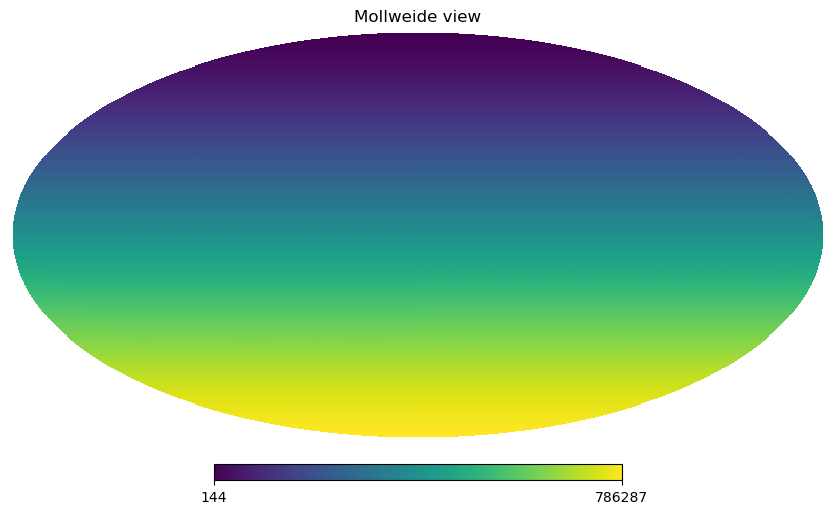

In [22]:
hp.mollview(hp_map)

pixel are ordered going down in latitude, from the north pole to the south pole.

In [26]:
## if I want to add an object to a pixel knowing its angular coordinates, 
## I use hp.ang2pix and then add 1 to that pixel
hp.ang2pix(n_side, theta=np.pi/2, phi=0)

391680

# Mock CMB

In [28]:
Omega_b= 0.05
Omega_c = 0.25
h=0.7
As = 2.1e-09
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1e-09
 At = 1.0
 

In [30]:
result = camb.get_results(pars)

In [31]:
power = result.get_cmb_power_spectra(pars, CMB_unit="muK")

In [32]:
power.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [39]:
C_l = power["unlensed_scalar"][:,0] ## contains autospectra and cross specta, I only want TT

In [40]:
ells = np.arange(len(C_l))

Text(0, 0.5, '$C_\\ell \\ \\ell(\\ell+1)/2\\pi$')

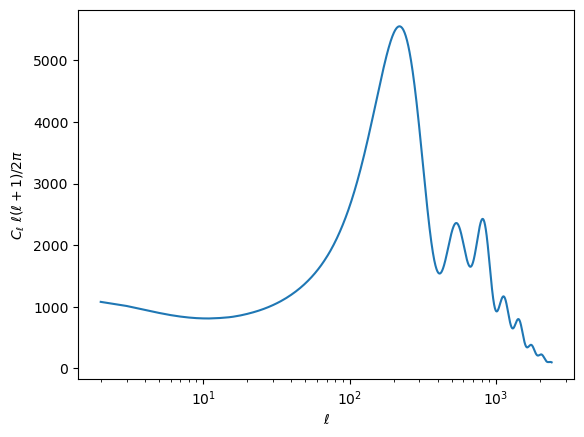

In [49]:
plt.semilogx(ells[2:], C_l[2:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell \ \ell(\ell+1)/2\pi$")

monopole and dipole are removed and fixed to zero, so I removed them. I am gonna redefine C_l without the normalization and in units of K.

In [50]:
power = result.get_cmb_power_spectra(pars, CMB_unit="K", raw_cl=True)

In [51]:
C_l = power["unlensed_scalar"][:,0]

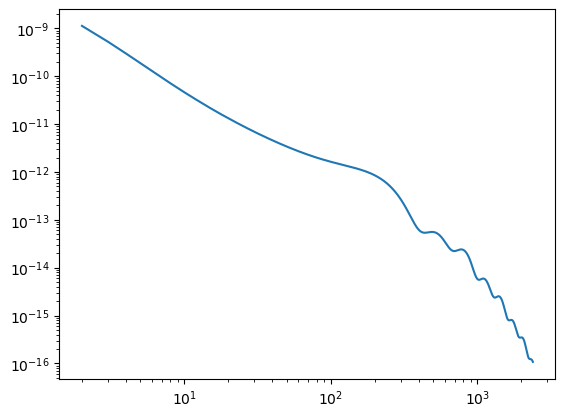

In [54]:
plt.loglog(ells[2:], C_l[2:])

Reminder: 
- $C_l$ are coefficients of the legendre expansion
- $a_{lm}$ are coefficients of the spherical harmonics expansion
- $C_l = \sum_m a_{lm} a_{lm}^* $

Healpix does the conversion for us

In [55]:
# compute synthetic alm
alms = hp.synalm(C_l)

In [57]:
alms.shape ## much bigger than C_l, I have two indexes here

(2883601,)

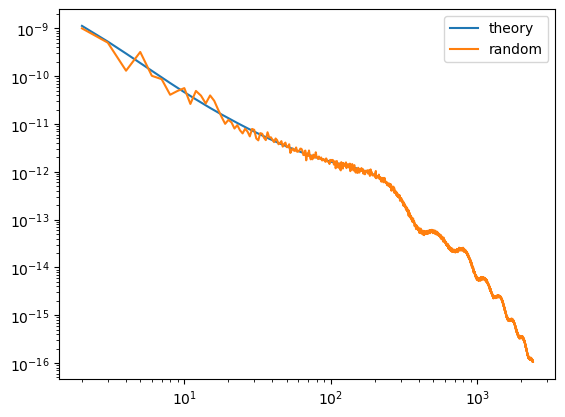

In [60]:
plt.loglog(ells[2:], C_l[2:], label='theory')
plt.loglog(ells[2:], hp.alm2cl(alms)[2:], label='random')
plt.legend()

In [98]:
mock_map = hp.alm2map(alms, nside=1024)

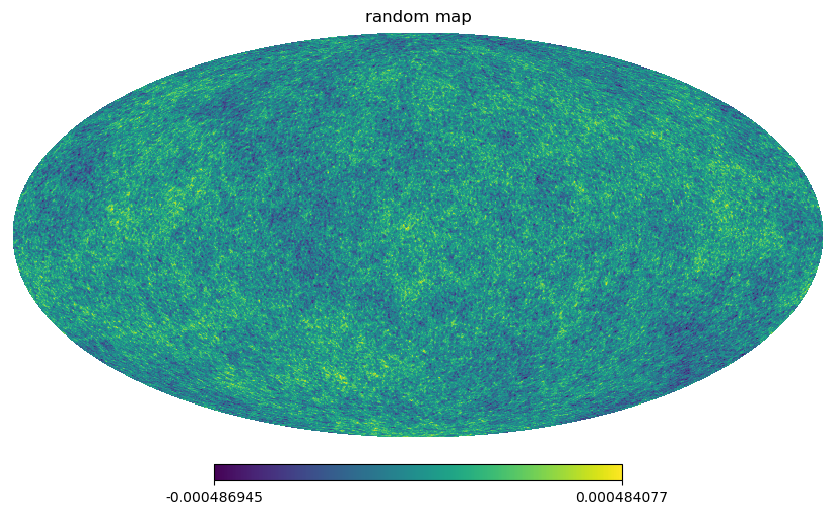

In [99]:
hp.mollview(mock_map, title='random map')

In [102]:
cl_meas = hp.anafast(mock_map, lmax = 2048)
ells_meas = np.arange(len(cl_meas))

Text(0, 0.5, '$C_\\ell \\ \\ell(\\ell+1)/2\\pi$')

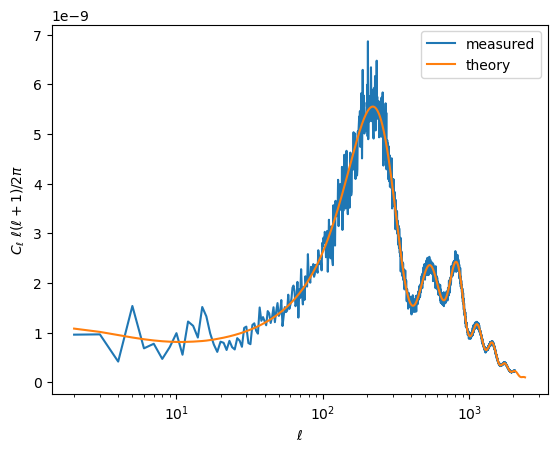

In [113]:
plt.semilogx(ells_meas[2:], ells_meas[2:]*(ells_meas[2:]+1)/(2*np.pi)*cl_meas[2:], label='measured')
plt.semilogx(ells[2:], ells[2:]*(ells[2:]+1)/(2*np.pi)*C_l[2:], label = 'theory')
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell \ \ell(\ell+1)/2\pi$")

At big scales (small l) I have more noise due to cosmic variance